# 1. Import the librariers

In [68]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Read Nasdaq Data

In [69]:
# Read the csv file using read_csv method of pandas
df = pd.read_csv('NASDAQ.csv', index_col=0)

# Convert index to datetime format
df.index = pd.to_datetime(df.index)

# Print the first five rows 
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000
2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2631550000
2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2596150000
2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2523450000
2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2407340000


# 3. Define the explanatory variables

In [70]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2019-01-02,-159.029785,186.830078
2019-01-03,121.270020,143.080078
2019-01-04,-171.719726,206.449707
2019-01-07,-65.940430,114.200196
2019-01-08,-3.560059,113.720215


# 4. Define the target variable

In [71]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Print y
y

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,

# 5. Split the data into train and test

In [72]:
# Define the split percentage
split_percentage = 0.6
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

# 6. Support Vector Classifier (SVC)

In [73]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [74]:
# Predict Signals
y_predict = cls.predict(X_test)

# 7. Classifier accuracy

In [75]:
# train and test accuracy
accuracy_test = accuracy_score(y_test, y_predict)

print('Accuracy:{: .2f}%'.format(accuracy_test*100))

Accuracy: 57.76%


# 8. Strategy implementation 

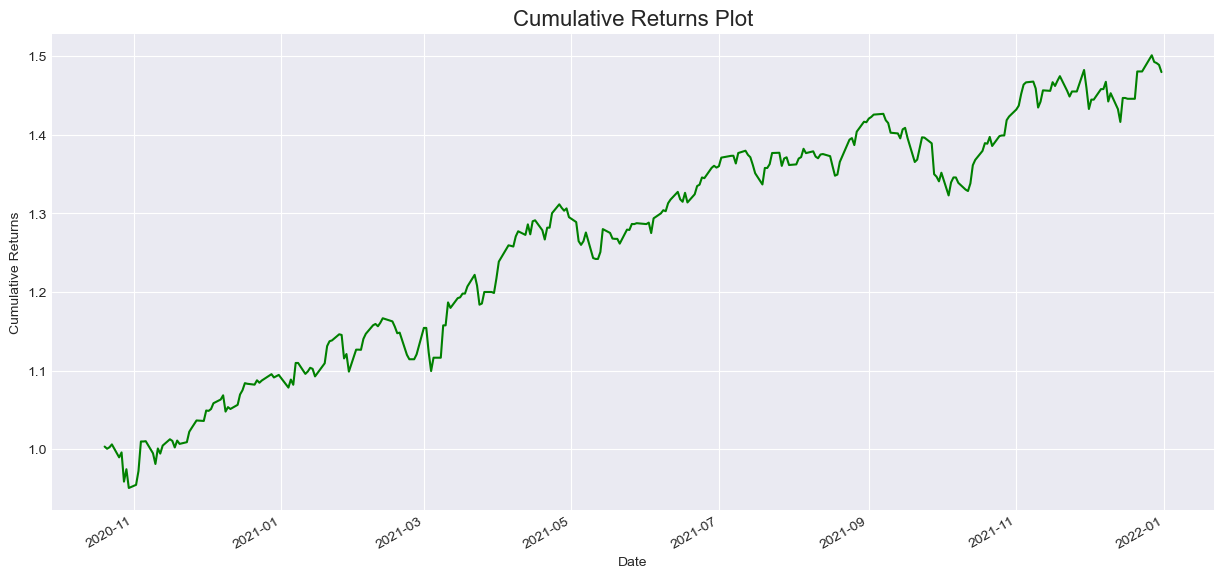

In [76]:
# Predicted Signal
df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Returns'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Returns'] = df.Returns * df.Predicted_Signal.shift(1)

# Calculate geometric returns
df['cumulative_returns'] = (df.Strategy_Returns.iloc[split:]+1).cumprod()

# Set the title and axis labels
plt.title("Cumulative Returns Plot", fontsize=16)
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")

# Plot geometric returns
df['cumulative_returns'].plot(figsize=(15, 7),color='g')

plt.show()